# Kernel PCA in R

In [5]:
# Kernel PCA

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[, 3:5]

In [6]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [7]:
# Feature Scaling
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

In [8]:
# Applying Kernel PCA
# install.packages('kernlab')
library(kernlab)
kpca = kpca(~., data = training_set[-3], kernel = 'rbfdot', features = 2)
training_set_pca = as.data.frame(predict(kpca, training_set))
training_set_pca$Purchased = training_set$Purchased
test_set_pca = as.data.frame(predict(kpca, test_set))
test_set_pca$Purchased = test_set$Purchased

In [9]:
# Fitting Logistic Regression to the Training set
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set_pca)

In [10]:
# Predicting the Test set results
prob_pred = predict(classifier, type = 'response', newdata = test_set_pca[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [11]:
# Making the Confusion Matrix
cm = table(test_set_pca[, 3], y_pred)

Warning message:
"package 'ElemStatLearn' was built under R version 3.3.3"

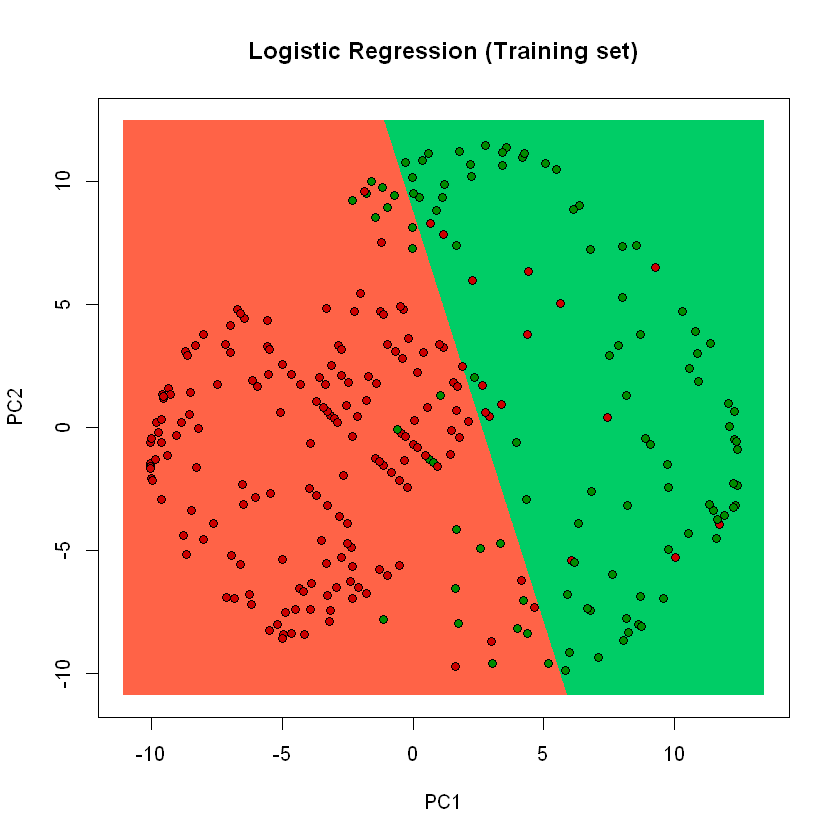

In [12]:
# Visualising the Training set results
# install.packages('ElemStatLearn')
library(ElemStatLearn)
set = training_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

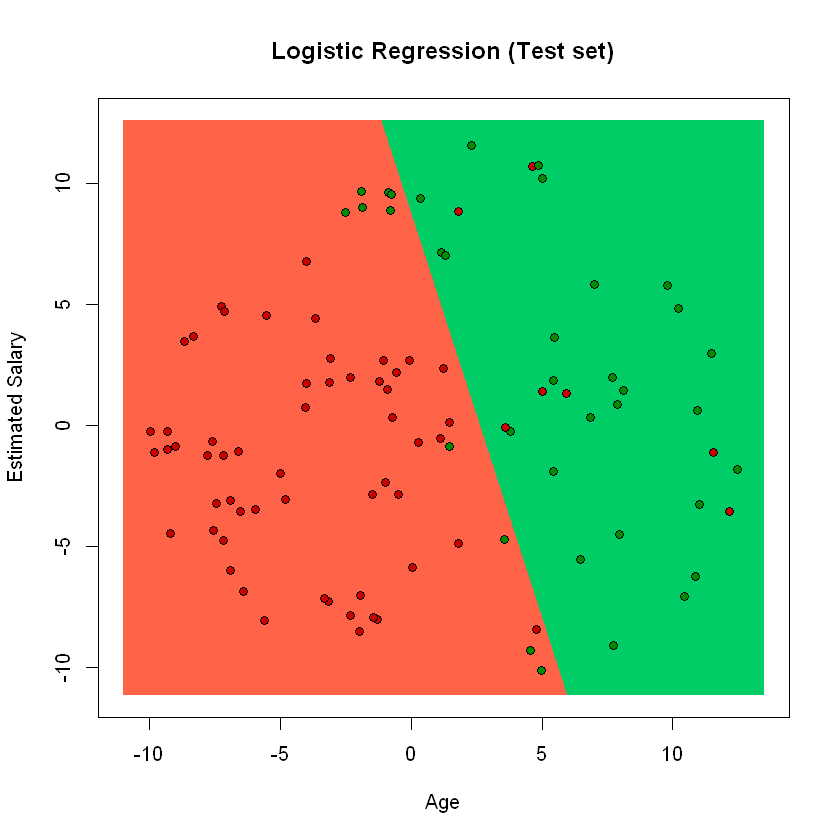

In [13]:
# Visualising the Test set results
# install.packages('ElemStatLearn')
library(ElemStatLearn)
set = test_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))